<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/euler_first_order_ode_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manual Euler Method for First-Order ODEs (Colab Notebook)

Notebook com exemplos de EDOs de primeira ordem resolvidos numericamente com o método de Euler implementado manualmente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_time_grid(t0, tf, h):
    n_steps = int(np.floor((tf - t0) / h))
    t = np.linspace(t0, t0 + n_steps * h, n_steps + 1)
    return t

def euler_solve(f, t0, tf, y0, h):
    t = make_time_grid(t0, tf, h)
    n = t.shape[0]
    y = np.zeros(n, dtype=float)
    y[0] = float(y0)
    for k in range(n - 1):
        tk = t[k]
        yk = y[k]
        increment = h * f(tk, yk)
        y[k + 1] = yk + increment
    return t, y

def plot_solution(t, y, label):
    plt.figure()
    plt.plot(t, y, marker='o', linestyle='-', label=label)
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid(True)
    plt.show()


## Exemplo 1: Decaimento exponencial (y' = -k*y)

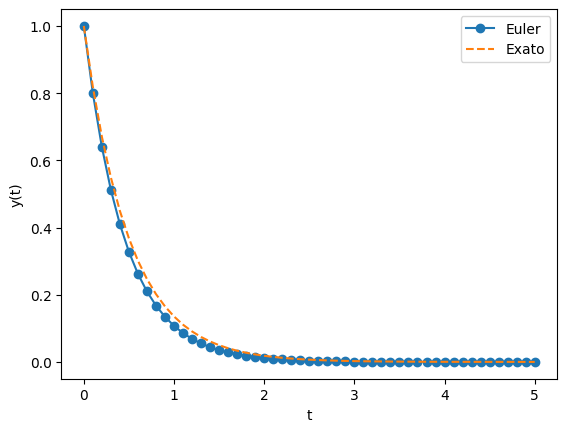

In [2]:
k = 2.0
y0 = 1.0
t0 = 0.0
tf = 5.0
h = 0.1

def f_expdecay(t, y):
    return -k * y

t, y_num = euler_solve(f_expdecay, t0, tf, y0, h)
y_exact = y0 * np.exp(-k * t)

plt.figure()
plt.plot(t, y_num, 'o-', label='Euler')
plt.plot(t, y_exact, '--', label='Exato')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()


## Exemplo 2: Circuito RC

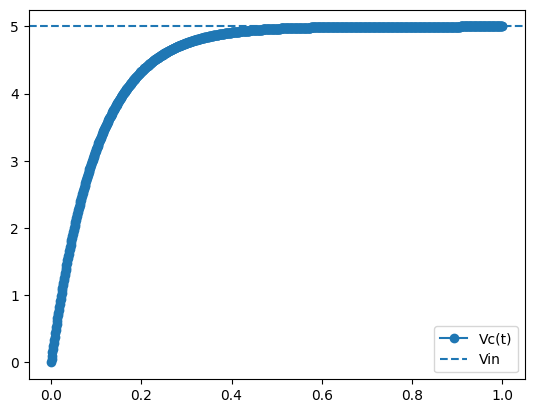

In [3]:
R = 1e3
C = 100e-6
V_step = 5.0

def Vin(t):
    return V_step

def f_rc(t, Vc):
    return (Vin(t) - Vc) / (R * C)

t_rc, Vc = euler_solve(f_rc, 0, 1, 0, 0.001)
plt.plot(t_rc, Vc, 'o-', label='Vc(t)')
plt.axhline(V_step, linestyle='--', label='Vin')
plt.legend()
plt.show()


## Exemplo 3: Resfriamento de Newton

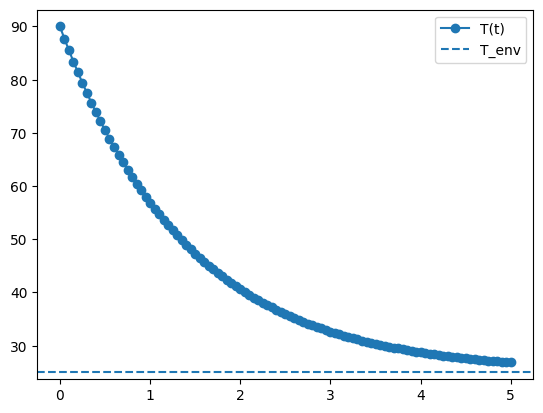

In [4]:
k_cool = 0.7
T_env = 25.0
T0 = 90.0

def f_cooling(t, T):
    return -k_cool * (T - T_env)

t_c, T_c = euler_solve(f_cooling, 0, 5, T0, 0.05)
plt.plot(t_c, T_c, 'o-', label='T(t)')
plt.axhline(T_env, linestyle='--', label='T_env')
plt.legend()
plt.show()


## Exemplo 4: Crescimento logístico

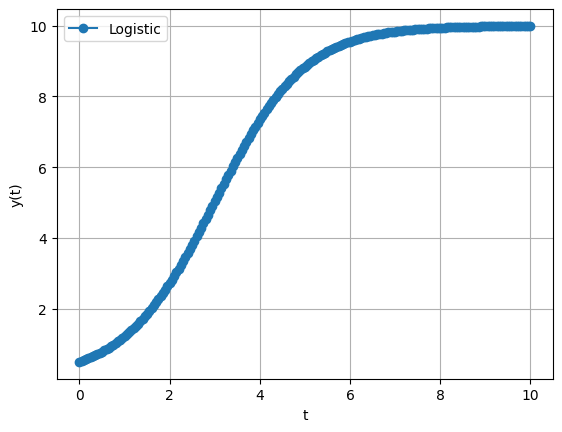

In [5]:
r = 1.0
K = 10.0
y0 = 0.5

def f_logistic(t, y):
    return r * y * (1.0 - y / K)

t_l, y_l = euler_solve(f_logistic, 0, 10, y0, 0.05)
plot_solution(t_l, y_l, 'Logistic')
